In [1]:

!pip install surprise

  Using cached https://files.pythonhosted.org/packages/61/de/e5cba8682201fcf9c3719a6fdda95693468ed061945493dea2dd37c5618b/surprise-0.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4d/fc/cd4210b247d1dca421c25994740cbbf03c5e980e31881f10eaddf45fdab0/scikit-surprise-1.0.6.tar.gz
  Running setup.py bdist_wheel for scikit-surprise: started
  Running setup.py bdist_wheel for scikit-surprise: finished with status 'error'
  Complete output from command C:\Users\sharan\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\sharan\\AppData\\Local\\Temp\\pip-install-917a435o\\scikit-surprise\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\sharan\AppData\Local\Temp\pip-wheel-xkq5xjy0 --python-tag cp36:
  C:\Users\sharan\Anaconda3\lib\distutils\dist.py:261: UserWarning: Unknown distribution option: 'long_description_content_type'
   

  Failed building wheel for scikit-surprise
distributed 1.21.8 requires msgpack, which is not installed.
Command "C:\Users\sharan\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\sharan\\AppData\\Local\\Temp\\pip-install-917a435o\\scikit-surprise\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\sharan\AppData\Local\Temp\pip-record-lr_vhywc\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\sharan\AppData\Local\Temp\pip-install-917a435o\scikit-surprise\
You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt 
#import graphlab
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:

df = pd.read_csv('./ratings_electronics.csv',names=["user_id","product_id","ratings","time_stamp"])

In [5]:
df.shape

(7824482, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id       object
product_id    object
ratings       float64
time_stamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [7]:
df.head()

,user_id,product_id,ratings,time_stamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [9]:
df.drop(columns = "time_stamp",inplace =True,axis =1)

C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


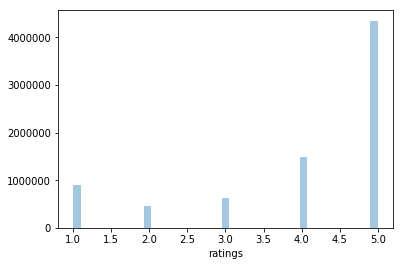

In [11]:
sns.distplot(df.ratings, kde=False, bins = 39);

In [12]:
df.head()

,user_id,product_id,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [13]:
df['user_id'].count()

7824482

In [14]:
users = df.groupby(['user_id']).count()

In [15]:
df.isnull().sum()

user_id       0
product_id    0
ratings       0
dtype: int64

In [17]:
df[df["ratings"].isnull()]

,user_id,product_id,ratings


In [18]:
df["ratings"].unique()

array([5., 1., 3., 2., 4.])

In [19]:
#product_rating[product_rating["product_id"] =='B']
#product_rating[product_rating["user_id"] =='A156XWKMCE31UT']
#print("Both ways it has only one value, so not possible to take mean and replace it. Anyhow we are gng to use only those user who have rated 50 or more ")

In [20]:
users.reset_index(inplace = True)

In [21]:
users.head()

,user_id,product_id,ratings
0,A00000262KYZUE4J55XGL,1,1
1,A000063614T1OE0BUSKUT,2,2
2,A00009182QVLSWIGHLS1B,1,1
3,A00009661LC9LQPGKJ24G,1,1
4,A00010809P09NUU6ZP6H,1,1


In [24]:
f_user = users.loc[users["ratings"]>=50]

In [25]:
type(f_user)

pandas.core.frame.DataFrame

In [30]:
rating_data = pd.merge(df, f_user, on='user_id', how='inner')
rating_data.head()

,user_id,product_id_x,ratings_x,product_id_y,ratings_y
0,A3BY5KCNQZXV5U,0594451647,5.0,50,50
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50,50
2,A3BY5KCNQZXV5U,B000063574,5.0,50,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50,50
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50,50


In [31]:
rating_data.drop(columns = ["product_id_y","ratings_y"],axis =1,inplace =True)

In [32]:
rating_data.columns = ['user_id', 'product_id', 'rating']

In [33]:
rating_data.head()

,user_id,product_id,rating
0,A3BY5KCNQZXV5U,0594451647,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0
2,A3BY5KCNQZXV5U,B000063574,5.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000101AEAB70>]],
      dtype=object)

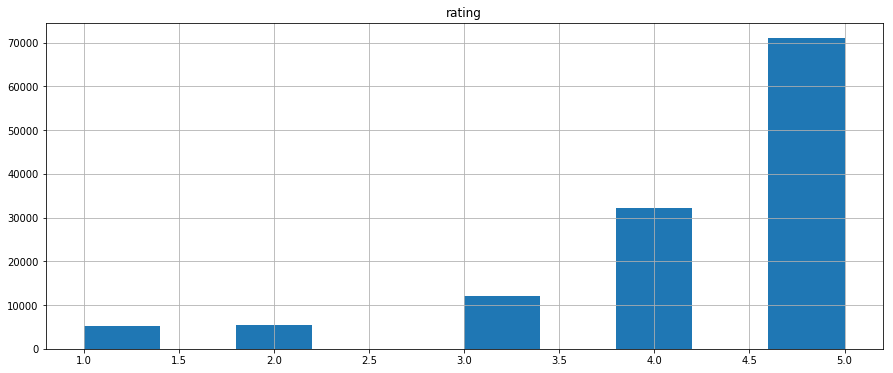

In [34]:
rating_data.rating = rating_data.rating.astype('int64') 
rating_data.hist(column="rating",grid = True,figsize = (15,6))
plt.show()

In [35]:
print("Popularity based Recommendation system")

Popularity based Recommendation system


In [36]:
rating_data.shape
print('\n')
len(rating_data["product_id"].unique())
print('\n')
len(rating_data["user_id"].unique())

(125871, 3)

48190

1540

In [37]:
#R_df = rating_data.pivot(index = 'user_id', columns ='product_id', values = 'rating').fillna(0)
#R_df.tail()

In [38]:
rating_data.groupby(by='product_id')['rating'].mean().sort_values(ascending=False).head(5)

product_id
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: rating, dtype: float64

In [39]:
print("Top 5 products has been recommended on all data")

Top 5 products has been recommended on all data


In [40]:
#Trying to do for train and test for popularity based model

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test = train_test_split(rating_data, test_size = 0.3, random_state = 1)

In [43]:
X_rating_value = X_train.groupby(by='product_id')['rating'].mean().sort_values(ascending=False)

In [44]:
X_rating_test_value = X_test.groupby(by='product_id')['rating'].mean().sort_values(ascending=False)

In [45]:
train_value = X_rating_value.reset_index(name = 'rating')
train_value.head()

,product_id,rating
0,0594451647,5.0
1,B0013HOW6M,5.0
2,B0013FFN12,5.0
3,B0050MM40C,5.0
4,B0050MX77G,5.0


In [46]:
test_value = X_rating_test_value.reset_index(name = 'rating')
test_value.head()

,product_id,rating
0,B00LKG1MC8,5.0
1,B002SNCOGA,5.0
2,B002SW3MP8,5.0
3,B002SVQJ1S,5.0
4,B002STGF6O,5.0


In [47]:
same_products = pd.merge(test_value, train_value, on='product_id', how='inner')

In [48]:
print("Finding simillar poducts found in both to get RMSE")

Finding simillar poducts found in both to get RMSE


In [49]:
same_products.head()

,product_id,rating_x,rating_y
0,B002SW3MP8,5.0,3.000000
1,B002SQKVE4,5.0,5.000000
2,B002SQKL7Q,5.0,4.818182
3,B002SQ9ZX2,5.0,5.000000
4,B002SP2X5U,5.0,2.000000


In [50]:
test_value[test_value["product_id"] == "B002SW3MP8"]#preicted 

,product_id,rating
2,B002SW3MP8,5.0


In [51]:
train_value[train_value["product_id"] == "B002SW3MP8"]#actual

,product_id,rating
32853,B002SW3MP8,3.0


In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
print("RMSE value",np.sqrt(mean_squared_error(same_products["rating_y"],same_products["rating_x"])))

RMSE value 1.0987517295955944


In [54]:
print("Start of Build Collaborative Filtering model.")

Start of Build Collaborative Filtering model.


In [55]:
rating_data.shape

(125871, 3)

In [56]:
print("Tried with above 125871 records, got session crashed error, So minimizing my data set")
rating_data_colab = rating_data.iloc[0:10000]

Tried with above 125871 records, got session crashed error, So minimizing my data set


In [57]:
rating_data_colab.user_id=rating_data_colab.user_id.astype(str)
rating_data_colab.product_id=rating_data_colab.product_id.astype(str)

C:\Users\sharan\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [58]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
#forcebiy converting to this format as pandas cannot read by surprise, as it is the interaction column

ModuleNotFoundError: No module named 'surprise'

In [59]:
data = Dataset.load_from_df(rating_data_colab[['user_id', 'product_id', 'rating']], reader)

NameError: name 'Dataset' is not defined

In [60]:
data

NameError: name 'data' is not defined

In [61]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=123)
#performance can be calcluated by comparing r hat value of rating and existing rating value, So it can be supervised learning
#Special case of supervised

ModuleNotFoundError: No module named 'surprise'

In [62]:
print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(0))
#An inner id is created, for every one user id and item id an inner id is created

NameError: name 'trainset' is not defined

In [63]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

ModuleNotFoundError: No module named 'surprise'

In [64]:
len(rating_data_colab["user_id"].unique())

87

In [65]:
len(rating_data_colab["product_id"].unique())

8104

In [66]:
print("Since we have less user we go for user based collbarative filtering")

Since we have less user we go for user based collbarative filtering


In [67]:
trainset_cv = trainset

NameError: name 'trainset' is not defined

In [68]:
testset_cv = testset

NameError: name 'testset' is not defined

In [69]:
trainset_cv

NameError: name 'trainset_cv' is not defined

In [70]:
from surprise.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'surprise'

In [71]:
param_grid = {'k': [1, 50],
              'sim_options': {'name': ['msd', 'cosine','pearson'],
                              'user_based': [False]}
             }

In [72]:
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5)
#grid search works only on data and not on subset train or test
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

NameError: name 'GridSearchCV' is not defined

In [73]:
print("using same for user based collbartive filtering")

using same for user based collbartive filtering


In [74]:
param_grid = {'k': [1, 50],
              'sim_options': {'name': ['msd', 'cosine','pearson'],
                              'user_based': [True]}
             }

In [75]:
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5)
#grid search works only on data and not on subset train or test
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

NameError: name 'GridSearchCV' is not defined

In [76]:
print("form the above results we can go ahead with User based collbrative filtering as the computation was fast with less no. of user compared with item")
print("RMSE error also looks less with optimal k value = 50")

form the above results we can go ahead with User based collbrative filtering as the computation was fast with less no. of user compared with item
RMSE error also looks less with optimal k value = 50


In [77]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': True})
algo.fit(trainset)
# correlated rating takes, these many nieghbours from K 
# optimal k value can be found, use pearson correlation 

NameError: name 'KNNWithMeans' is not defined

In [78]:
# Evalute on test set
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)



NameError: name 'algo' is not defined

In [79]:
test_pred[:2]
##est values is the predicted rating, r_ui is the rating already found.Was impossible false represents data found in train and test, K = 0 refers actual k , it means no nearest neighbours picked for computation
##if no value found from test in train then popularity based rating happens on est of test data and was_impossible will be true

NameError: name 'test_pred' is not defined

In [80]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])

NameError: name 'test_pred' is not defined

In [81]:
predictions_df.columns = ["user_id","product_id","est_rating"]
predictions_df.sort_values(by = ["user_id","est_rating",],ascending=False,inplace=True)

NameError: name 'predictions_df' is not defined

In [82]:
predictions_df[:5]

NameError: name 'predictions_df' is not defined

In [83]:
predictions_df.head(20)

NameError: name 'predictions_df' is not defined

In [84]:
def get_top_five(user_id):
  return predictions_df[predictions_df["user_id"]==user_id].head()

In [85]:
get_top_five('AZ515FFZ7I2P7')

NameError: name 'predictions_df' is not defined

In [86]:
top_5_recos = predictions_df.groupby("user_id").head(5).reset_index(drop=True)

NameError: name 'predictions_df' is not defined

In [ ]:
top_5_recos